## Notebook to analyze data from game changer seasonal stat export

In [41]:
#import packages

import pandas as pd
from matplotlib import pyplot as plt

In [42]:
#Read csv into initial_df. Provide path to csv

initial_df = pd.read_csv('../data/tnbh11202022.csv')

In [43]:
#drop the row that contains the glossary. At this point, the column is still 'Unamed: 0'

initial_df.drop(initial_df[initial_df['Unnamed: 0'] == 'Glossary'].index, inplace = True)

In [44]:
#In the first row of the seasonal stats csv, there are 3 columm values. 'Batting', 'Pitching', and 'Fielding'

#Grab Number, Last, and First columns and save as player_df. we can use this as the first 3 columns in pitching and fielding dataframes
player_df = initial_df.iloc[:,:4]

#We want to slice the data from column1 to the 'Pitching' value. Drop the 'Pitching' column and call the new dataframe, initial_batting_df
initial_batting_df = initial_df.loc[:,:'Pitching'].drop(['Pitching'], axis='columns')

#Slice the csv from 'Pitching' to 'Fielding' and create the initial_pitching_df. Drop the 'Fielding' column at the end

initial_pitching_df = initial_df.loc[:,'Pitching':'Fielding'].drop(['Fielding'], axis='columns')

#Slice the csv from 'Fielding' to the end of the last column
initial_fielding_df = initial_df.loc[:,'Fielding':]

#Add the Number, First, and Last columns to the pitching and fielding dataframe. Batting was already set
initial_pitching_df = pd.concat([player_df, initial_pitching_df], axis = 1)
initial_fielding_df = pd.concat([player_df, initial_fielding_df], axis = 1)



In [45]:
#we need to change the column header row from the "unamed" headers to the first row in the csv which contain headers like "AVG", "OBS", etc

#grab the first row for the header
new_batting_header = initial_batting_df.iloc[0]
new_pitching_header = initial_pitching_df.iloc[0]
new_fielding_header = initial_fielding_df.iloc[0]

#take the data minus the header row. this creates a new dataframe

# (deprecated) initial_batting_df_drop_header_row = initial_batting_df[1:]
initial_batting_df_drop_header_row = initial_batting_df.iloc[1:,:]
initial_pitching_df_drop_header_row = initial_pitching_df.iloc[1:,:]
initial_fielding_df_drop_header_row = initial_fielding_df.iloc[1:,:]

#set the header row as the df header. the .column sets the headers of the dataframe
initial_batting_df_drop_header_row.columns = new_batting_header
initial_pitching_df_drop_header_row.columns = new_pitching_header
initial_fielding_df_drop_header_row.columns = new_fielding_header


In [46]:
#drop rows where the 'Number' column contains nulls

# (deprecated) initial_batting_df_drop_nan = initial_batting_df_drop_header_row[initial_batting_df_drop_header_row['Number'].notna()]
initial_batting_df_drop_nan = initial_batting_df_drop_header_row[initial_batting_df_drop_header_row.loc[:,'Number'].notna()]
initial_pitching_df_drop_nan = initial_pitching_df_drop_header_row[initial_pitching_df_drop_header_row.loc[:,'Number'].notna()]
initial_fielding_df_drop_nan = initial_fielding_df_drop_header_row[initial_fielding_df_drop_header_row.loc[:,'Number'].notna()]

initial_batting_df_drop_total = initial_batting_df_drop_nan[initial_batting_df_drop_nan['First'].notna()]
initial_pitching_df_drop_total = initial_pitching_df_drop_nan[initial_pitching_df_drop_nan['First'].notna()]
initial_fielding_df_drop_total = initial_fielding_df_drop_nan[initial_fielding_df_drop_nan['First'].notna()]

#Convert IP column from object type to float type, then remove all rows with IP (innings pitchted) greater than zero. This should leave only pitchers in this dataframe
initial_pitching_df_drop_total.loc[:,"IP"] = initial_pitching_df_drop_total["IP"].astype(float)
initial_pitching_df_drop_total = initial_pitching_df_drop_total.loc[(initial_pitching_df_drop_total['IP'] > 0)]



/Users/danielhighsmith/opt/anaconda3/lib/python3.9/site-packages/pandas/core/indexing.py:1951: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[selected_item_labels] = value


In [47]:
#Make dictionary for batting, pitching, and fielding column data types

batting_dict = {'Number':int, 'Last':str, 'First':str, 'GP':int, 'PA':int, 'AB':int, 'AVG':float, 'OBP':float, 'OPS':float, 'SLG':float, 'H':int, '1B':int, '2B':int, '3B':int, 'HR':int, 'RBI':int, 'R':int, 'BB':int, 'SO':int, 'K-L':int, 'HBP':int, 'SAC':int, 'SF':int, 'ROE':int, 'FC':int, 'SB':int, 'SB%':float, 'CS':int, 'PIK':int, 'QAB':int, 'QAB%':float, 'PA/BB':float, 'BB/K':float, 'C%':float, 'HHB':int, 'LD%':float, 'FB%':float, 'GB%':float, 'BABIP':float, 'BA/RISP':float, 'LOB':int, '2OUTRBI':int, 'XBH':int, 'TB':int, 'PS':int, 'PS/PA':float, '2S+3':int, '2S+3%':float, '6+':int, "6+%":float, 'AB/HR':int, 'GIDP':int, 'GITP':int, 'CI':int}

pitching_dict = {'Number':int, 'Last':str, 'First':str, 'IP':int, 'GP':int, 'GS':int, 'BF':int, '#P':int, 'W':int, 'L':int, 'SV':int, 'SVO':int, 'BS':int, 'SV%':float, 'H':int, 'R':int, 'ER':int, 'BB':int, 'SO':int, 'K-L':int, 'HBP':int, 'ERA':float, 'WHIP':float, 'LOB':int, 'BK':int, 'PIK':int, 'CS':int, 'SB':int, 'SB%':float, 'WP':int, 'BAA':float, 'P/IP':float, 'P/BF':float, '<3%':float, 'LOO':int, '1ST2OUT':int, '123INN':int, '<13':int, 'FIP':float, 'S%':float, 'FPS%':float, 'FPSO%':float, 'FPSW%':float, 'FPSH%':float, 'BB/INN':float, '0BBINN':int, 'BBS':int, 'LOBB':int, 'LOBBS':int, 'SM%':float, 'K/BF':float, 'K/BB':float, 'WEAK%':float, 'HHB%':float, 'GO/AO':float, 'HR':int, 'LD%':float, 'FB%':float, 'GB%':float, 'BABIP':float, 'BA/RISP':float, 'FB':int, 'FBS':int, 'FBS%':float, 'FBSW%':float, 'FBSM%':float, 'CH':int, 'CHS':int, 'CHS%':float, 'CHSW%':float, 'CHSM%':float, 'RB':int, 'RBS':int, 'RBS%':float, 'RBSW%':float, 'RBSM%':float, 'DB':int, 'DBS':int, 'DBS%':float, 'DBSW%':float, 'DBSM%':float, 'SC':int, 'SCS':int, 'SCS%':float, 'SCSW%':float, 'SCSM%':float, 'CB':int, 'CBS':int, 'CBS%':float, 'CBSW%':float, 'CBSM%':float, 'DC':int, 'DCS':int, 'DCS%':float, 'DCSW%':float, 'DCSM%':float, 'KB':int, 'KBS':int, 'KBS%':float, 'KBSW%':float, 'KBSM%':float, 'KC':int, 'KCS':int, 'KCS%':float, 'KCSW%':float, 'KCSM%':float, 'OS':int, 'OSS':int, 'OSS%':float, 'OSSW%':float, 'OSSM%':float}

fielding_dict = {'Number': int, 'Last':str, 'First':str, 'GP':int, 'TC':int, 'A':int, 'PO':int, 'FPCT':float, 'E':int, 'DP':int, 'TP':int, 'INN':float, 'PB':int, 'SB':int, 'SB-ATT':str, 'CS':int, 'CS%':float, 'PIK':int, 'CI':int}

In [48]:
#create new dataframe with correct column dtypes
batting_df = initial_batting_df_drop_total.astype(batting_dict)
pitching_df = initial_pitching_df_drop_total.astype(pitching_dict)
fielding_df = initial_fielding_df_drop_total.astype(fielding_dict)
catchers_df = fielding_df.loc[(fielding_df['INN'] > 0)]


In [56]:
# Create a new dataframe with platers who have played 10 games or more. This will eliminate most pick up players. Comment this section out if early in season
batting_df_ten = batting_df.loc[(batting_df['GP'] >= 10)]
fielding_df_ten = fielding_df.loc[(fielding_df['GP'] >= 10)]


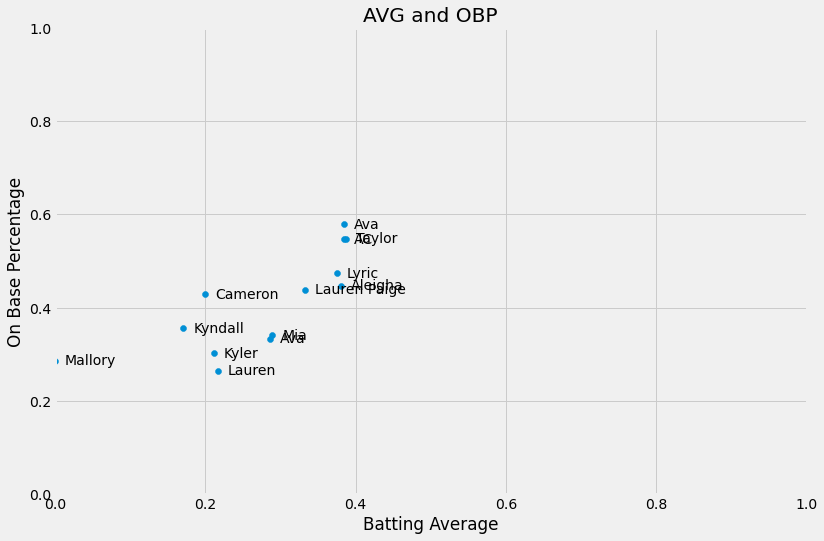

In [66]:
# Plot the AVG column on the x-axis and the OBP column on the y-axis
# plt.xlim and plt.ylim moves the graph out to 1.0 which is a 1000 batting average and 1000 on base percentage
# plt.figure increases the plot size so the scatter plot is not so crowded
fig = plt.figure(figsize=(12,8))
plt.style.use('fivethirtyeight')
plt.scatter(batting_df_ten["AVG"], batting_df_ten["OBP"])
plt.xlabel("Batting Average")
plt.ylabel('On Base Percentage')
plt.title('AVG and OBP')
plt.grid()
plt.xlim((0,1))
plt.ylim((0,1))


for x_pos, y_pos, label in zip(batting_df_ten["AVG"], batting_df_ten["OBP"], batting_df_ten["First"]):
    plt.annotate(label,             # The label for this point
                xy=(x_pos, y_pos), # Position of the corresponding point
                xytext=(10, 0),     # Offset text by 7 points to the right
                textcoords='offset points', # tell it to use offset points
                ha='left',         # Horizontally aligned to the left
                va='center')       # Vertical alignment is centered

# plt.savefig('avg_obp.png') 
# gc_team_t = np.transpose(gc_team)

#plt.grid() shows grid lines on the plot
plt.grid()

plt.show()

<BarContainer object of 5 artists>

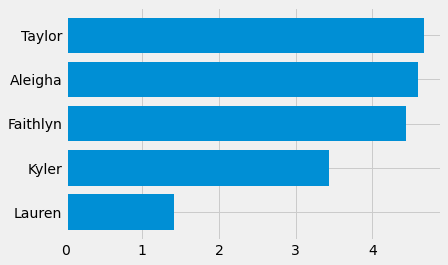

In [61]:
#horizontal bar chare of batting averages, sorted AVG with the sorted() function
#plt.barh(batting_df.First, sorted(batting_df.AVG))

#plt.barh(pitching_df.First, sorted(pitching_df.IP))

plt.barh(pitching_df.First, sorted(pitching_df.FIP))
